# Exercicio Pratico DBSCAN

## Importando os pacotes

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.datasets import load_iris

## Dataset

In [ ]:
load_iris()

{'DESCR': '.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ===========

In [ ]:
Xdf, df['target'] = pd.DataFrame(load_iris().data,columns= load_iris().feature_names), load_iris().target

In [ ]:
Xdf

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
len(Xdf)

150

In [ ]:
y

NameError: ignored

In [ ]:
dataframe = pd.DataFrame(Xdf)

In [ ]:
dataframe.head(5)

,0,1,2,3,4
0,-10.397876,4.360792,-1.584021,-6.673737,7.751483
1,-6.644041,7.554558,-10.383175,9.374333,0.743183
2,2.558899,5.007154,3.663898,-4.205766,-4.092741
3,-9.348389,4.350812,-2.944685,-5.706560,8.898080
4,3.396861,8.781691,0.738109,-4.137496,-5.617840


## Análise

In [ ]:
dataframe.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


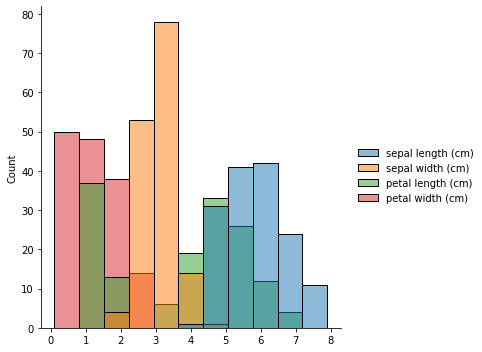

In [ ]:
sns.displot(dataframe)

In [ ]:
sns.displot(dataframe[1])

KeyError: ignored

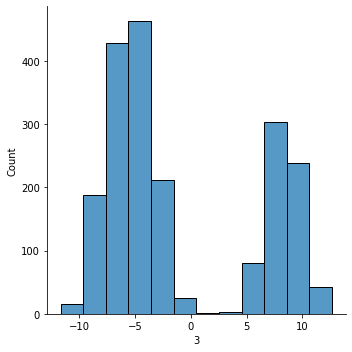

In [ ]:
sns.displot(dataframe[3])

In [ ]:
db = DBSCAN()
retorno = db.fit_predict(X)

In [ ]:
db.get_params()

{'algorithm': 'auto',
 'eps': 0.5,
 'leaf_size': 30,
 'metric': 'euclidean',
 'metric_params': None,
 'min_samples': 5,
 'n_jobs': None,
 'p': None}

In [ ]:
pd.Series(retorno).value_counts()

-1    2000
dtype: int64

### Utilizando o modelo


*   MinPt: Como temos 5 dimensões utilizaremos o MinPts = 2 * 5 = 10
*   EPS: Vamos achar o EPS calculando a distância média entre cada ponto no conjunto de dados e seus 10 vizinhos mais próximos (meu valor MinPts selecionado).



In [ ]:
#Calcule a distância média entre cada ponto no conjunto de dados e seus 10 vizinhos mais próximos (meu valor MinPts selecionado).
plt.figure(figsize=(10,7))
neighbors = NearestNeighbors(n_neighbors=10)
neighbors_fit = neighbors.fit(dataframe)

<Figure size 720x504 with 0 Axes>

In [ ]:
distances, indices = neighbors_fit.kneighbors(dataframe)

In [ ]:
len(distances)

2000

In [ ]:
distances[:,1]

array([0.66007227, 2.3126266 , 1.5436392 , ..., 0.90588074, 1.73523818,
       1.05269293])

In [ ]:
distances = np.sort(distances, axis=0)

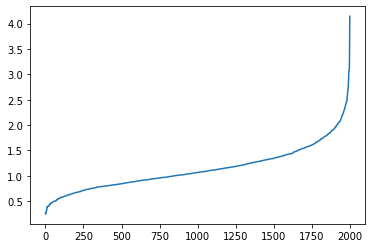

In [ ]:
plt.plot(distances[:,1])
plt.show()

In [ ]:
for i in range(100):
  print(i)
  plt.plot(distances[:,1])
  plt.show()

In [ ]:
model = DBSCAN(eps=2, min_samples=10)
yhat = model.fit_predict(X)
clusters = np.unique(yhat)


In [ ]:
dataframe['dbscan_cluster'] = yhat

In [ ]:
dataframe['dbscan_cluster'].value_counts()

 2    600
 1    597
 0    589
-1    214
Name: dbscan_cluster, dtype: int64

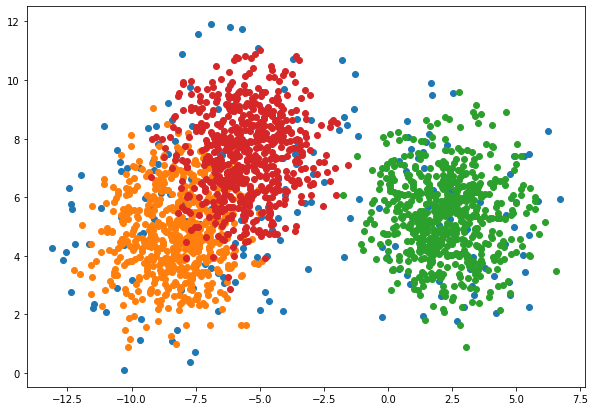

In [ ]:
fig= plt.figure(figsize=(10,7))
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = np.where(yhat == cluster)
    # create scatter of these samples
    plt.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
plt.show()

### Comparação kmeans

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
km = KMeans(3)

In [ ]:
dataframe.columns

Index([0, 1, 2, 3, 4, 'dbscan_cluster'], dtype='object')

In [ ]:
dataframe['kmeans_clusters'] = km.fit_predict(dataframe[[0,1,2,3,4]])

In [ ]:
dataframe

,0,1,2,3,4,dbscan_cluster
0,-10.397876,4.360792,-1.584021,-6.673737,7.751483,0
1,-6.644041,7.554558,-10.383175,9.374333,0.743183,-1
2,2.558899,5.007154,3.663898,-4.205766,-4.092741,1
3,-9.348389,4.350812,-2.944685,-5.706560,8.898080,0
4,3.396861,8.781691,0.738109,-4.137496,-5.617840,1
...,...,...,...,...,...,...
1995,-7.733664,4.860262,-0.253524,-7.574888,7.813723,0
1996,-8.941344,6.422689,0.116346,-4.986655,6.009653,0
1997,-8.349841,2.637856,-0.132488,-6.466095,8.206155,0
1998,-7.627129,3.195392,-1.253935,-6.589630,3.701441,0


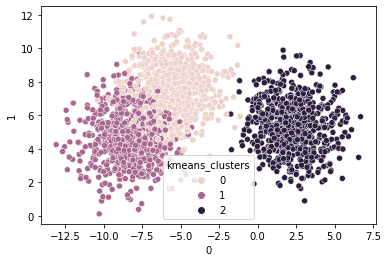

In [ ]:
sns.scatterplot(x = 0 ,y = 1, hue= 'kmeans_clusters', data = dataframe)

In [ ]:
dataframe.groupby('dbscan_cluster')['kmeans_clusters'].value_counts()

dbscan_cluster  kmeans_clusters
-1              1                   77
                0                   70
                2                   67
 0              1                  589
 1              0                  597
 2              2                  600
Name: kmeans_clusters, dtype: int64